In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WNU93LLN8FUCGoH7qUcd")
project = rf.workspace("varun-qlsfy").project("table-detection-gomjy")
version = project.version(10)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Table-Detection-10 in yolov8:: 100%|██████████| 3434/3434 [00:01<00:00, 3199.57it/s]


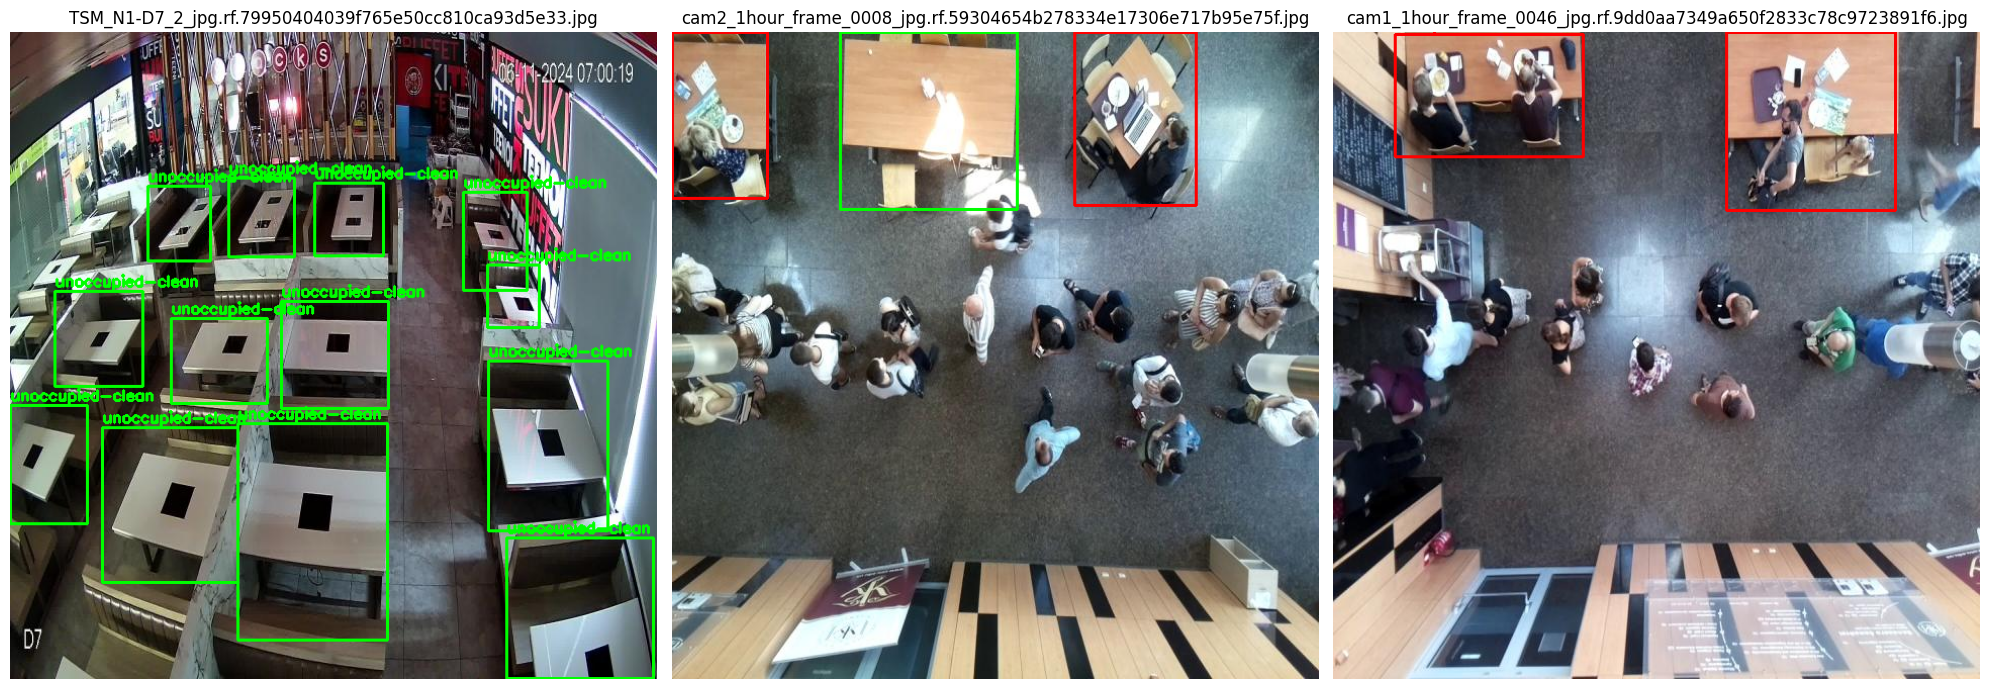

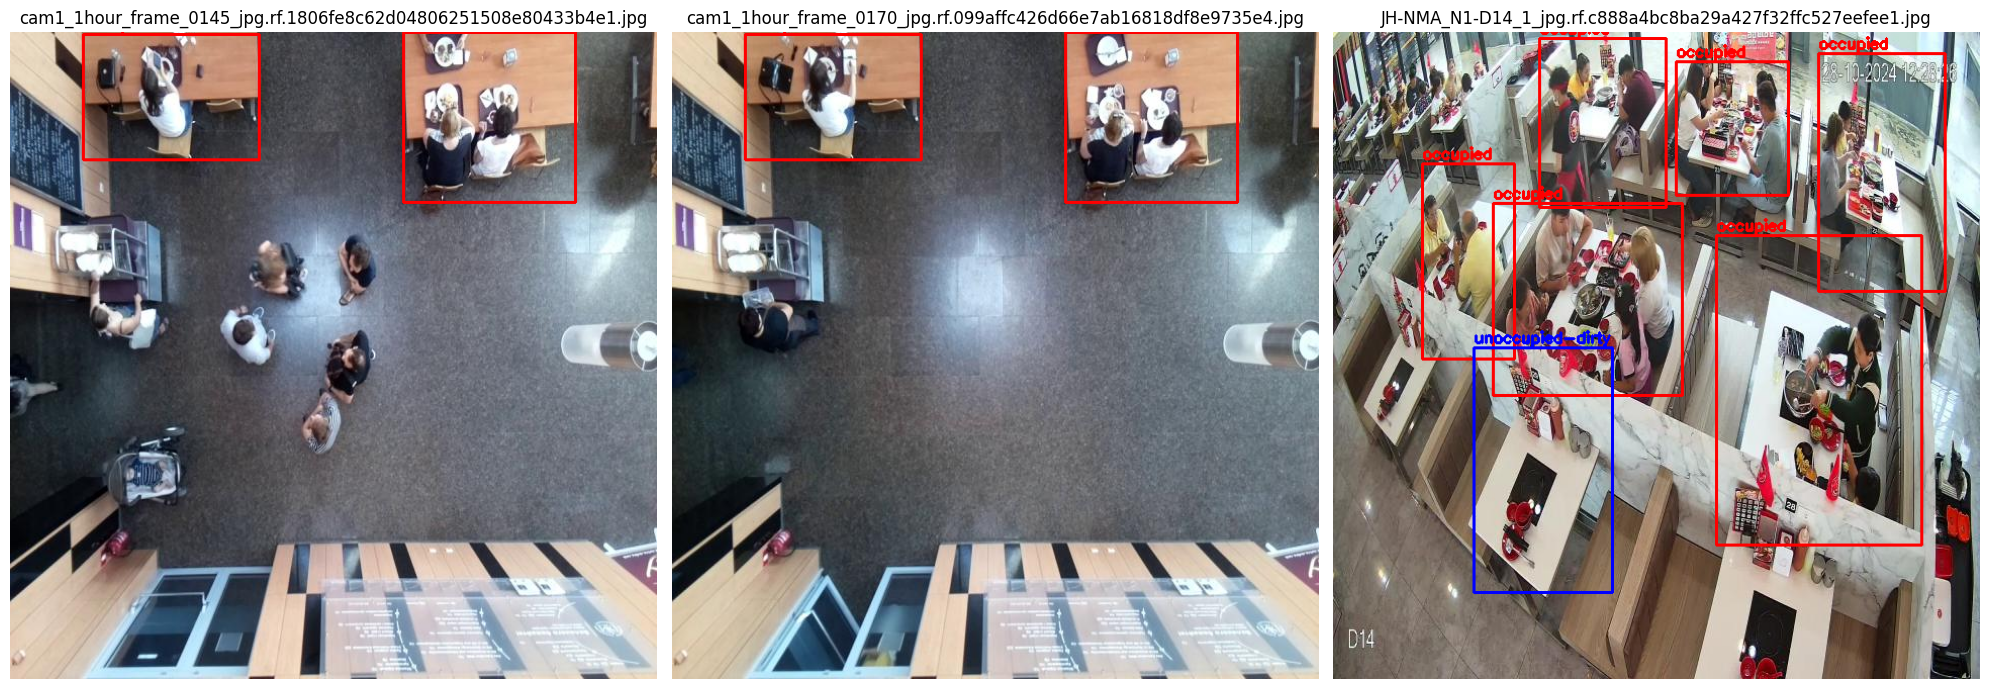

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import yaml

# Path to images and labels
image_dir = os.path.join(dataset.location, "train", "images")
label_dir = os.path.join(dataset.location, "train", "labels")

# Get list of image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Load class names
with open(os.path.join(dataset.location, "data.yaml"), "r") as f:
    data_yaml = f.read()

class_names = yaml.safe_load(data_yaml)['names']

# Define unique colors for each class (BGR format for OpenCV)
color_map = [
    (255, 0, 0),    # Red
    (0, 255, 0),    # Green
    (0, 0, 255),    # Blue
    (255, 255, 0),  # Cyan
    (255, 0, 255),  # Magenta
    (0, 255, 255),  # Yellow
]

# Function to draw bounding boxes
def draw_bboxes(img_path, label_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    if os.path.exists(label_path):
        with open(label_path, "r") as file:
            for line in file.readlines():
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                cls_id = int(cls)
                cls_name = class_names[cls_id]
                color = color_map[cls_id % len(color_map)]  # cycle colors if more classes
                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                cv2.putText(image, cls_name, (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Show images
plt.figure(figsize=(20, 10))
for i in range(min(3, len(image_files))):
    img_file = image_files[i]
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))
    image_with_boxes = draw_bboxes(img_path, label_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(image_with_boxes)
    plt.axis("off")
    plt.title(img_file)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i in range(3, min(6, len(image_files))):
    img_file = image_files[i]
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))
    image_with_boxes = draw_bboxes(img_path, label_path)
    plt.subplot(1, 3, i - 2)  # To start subplot index at 1 again
    plt.imshow(image_with_boxes)
    plt.axis("off")
    plt.title(img_file)
plt.tight_layout()
plt.show()

